<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [3]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
# %pylab inline

In [4]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

In [5]:
data.groupby('sex').count()['age']

sex
Female    10771
Male      21790
Name: age, dtype: int64

**2. Каков средний возраст (признак age) женщин?**

In [6]:
data[data['sex'] == 'Female'].age.mean()

36.858230433571627

**3. Какова доля граждан Германии (признак native-country)?**

In [7]:
data['native-country'].value_counts(normalize=True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

**4. Постройте гистограмму распределения (bar plot) образования людей (признак education).**

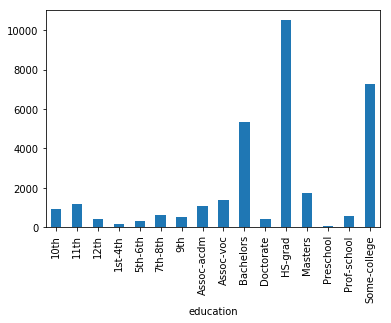

In [16]:
data.groupby('education').count().age.plot.bar()

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? **

In [25]:
data[data['salary'] == '>50K'].describe()
data[data['salary'] == '<=50K'].describe()
pd.crosstab(data['salary'], data['age'])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,7841.000000,7.841000e+03,7841.000000,7841.000000,7841.000000,7841.000000
mean,44.249841,1.880050e+05,11.611657,4006.142456,195.001530,45.473026
std,10.519028,1.025418e+05,2.385129,14570.378951,595.487574,11.012971
min,19.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000
25%,36.000000,1.191010e+05,10.000000,0.000000,0.000000,40.000000
50%,44.000000,1.761010e+05,12.000000,0.000000,0.000000,40.000000
75%,51.000000,2.309590e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,24720.000000
mean,36.783738,1.903409e+05,9.595065,148.752468,53.142921,38.840210
std,14.020088,1.064823e+05,2.436147,963.139307,310.755769,12.318995
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,25.000000,1.176060e+05,9.000000,0.000000,0.000000,35.000000
50%,34.000000,1.794650e+05,9.000000,0.000000,0.000000,40.000000
75%,46.000000,2.390230e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000


age,17,18,19,20,21,22,23,24,25,26,...,80,81,82,83,84,85,86,87,88,90
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,395,550,710,753,717,752,865,767,788,722,...,20,17,12,4,9,3,1,1,3,35
>50K,0,0,2,0,3,13,12,31,53,63,...,2,3,0,2,1,0,0,0,0,8


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [28]:
data[data['salary'] == '>50K'].groupby('education').count()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
education,,,,,,,,,,,,,,
10th,62,62,62,62,62,62,62,62,62,62,62,62,62,62
11th,60,60,60,60,60,60,60,60,60,60,60,60,60,60
12th,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1st-4th,6,6,6,6,6,6,6,6,6,6,6,6,6,6
5th-6th,16,16,16,16,16,16,16,16,16,16,16,16,16,16
7th-8th,40,40,40,40,40,40,40,40,40,40,40,40,40,40
9th,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Assoc-acdm,265,265,265,265,265,265,265,265,265,265,265,265,265,265
Assoc-voc,361,361,361,361,361,361,361,361,361,361,361,361,361,361


**7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [29]:
data.groupby(['race', 'sex']).describe()

age  capital-gain  capital-loss  \
race               sex                                                      
Amer-Indian-Eskimo Female count    119.000000    119.000000    119.000000   
                          mean      37.117647    544.605042     14.462185   
                          std       13.114991   2451.591587    157.763811   
                          min       17.000000      0.000000      0.000000   
                          25%       27.000000      0.000000      0.000000   
                          50%       36.000000      0.000000      0.000000   
                          75%       46.000000      0.000000      0.000000   
                          max       80.000000  15024.000000   1721.000000   
                   Male   count    192.000000    192.000000    192.000000   
                          mean      37.208333    675.260417     46.395833   
                          std       12.049563   2929.745443    286.562584   
                          min       17.000000      0.000000      0.000000   
                          25%       28.000000      0.000000      0.000000   
                          50%       35.000000      0.000000      0.000000   
                          75%       45.000000      0.000000      0.000000   
                          max       82.000000  27828.000000   1980.000000   
Asian-Pac-Islander Female count    346.000000    346.000000    346.000000   
                          mean      35.089595    778.436416     50.852601   
                          std       12.300845   7675.228631    296.529225   
                          min       17.000000      0.000000      0.000000   
                          25%       25.000000      0.000000      0.000000   
                          50%       33.000000      0.000000      0.000000   
                          75%       43.750000      0.000000      0.000000   
                          max       75.000000  99999.000000   2258.000000   
                   Male   count    693.000000    693.000000    693.000000   
                          mean      39.073593   1827.813853    120.373737   
                          std       12.883944  10947.525528    472.917697   
                          min       18.000000      0.000000      0.000000   
                          25%       29.000000      0.000000      0.000000   
                          50%       37.000000      0.000000      0.000000   
...                                       ...           ...           ...   
Other              Female std       11.631599   1317.326460    231.796929   
                          min       17.000000      0.000000      0.000000   
                          25%       23.000000      0.000000      0.000000   
                          50%       29.000000      0.000000      0.000000   
                          75%       39.000000      0.000000      0.000000   
                          max       74.000000   7688.000000   1740.000000   
                   Male   count    162.000000    162.000000    162.000000   
                          mean      34.654321   1392.185185     77.746914   
                          std       11.355531  11093.711595    370.986720   
                          min       17.000000      0.000000      0.000000   
                          25%       26.000000      0.000000      0.000000   
                          50%       32.000000      0.000000      0.000000   
                          75%       42.000000      0.000000      0.000000   
                          max       77.000000  99999.000000   2179.000000   
White              Female count   8642.000000   8642.000000   8642.000000   
                          mean      36.811618    573.610391     65.390535   
                          std       14.329093   4763.131649    352.330817   
                          min       17.000000      0.000000      0.000000   
                          25%       25.000000      0.000000      0.000000   
                          50%       35

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)?**

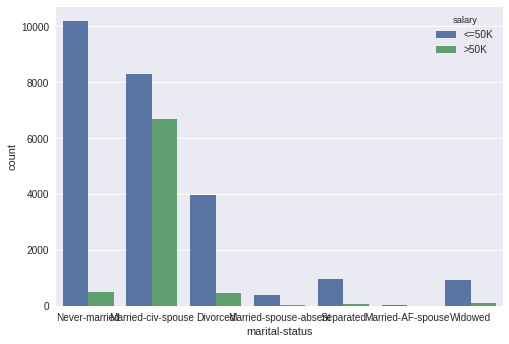

In [36]:
import seaborn as sns
sns.countplot(x='marital-status', hue='salary', data=data);
# hs = data[data['salary'] == '>50K']
# hs.groupby('marital-status').describe()

**9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [47]:
m = data['hours-per-week'].value_counts()
# m.sort_index()
mm = data[data['hours-per-week'] == 99]
pd.crosstab(mm['salary'], mm['hours-per-week'], normalize=True)


hours-per-week,99
salary,
<=50K,0.705882
>50K,0.294118


**10. Посчитайте среднее время работы (hours-per-week) зарабатывающих много и мало (salary) для каждой страны (native-country).**

In [51]:
data[data['native-country'] == 'Japan'].groupby(['native-country', 'salary']).mean()

age         fnlwgt  education-num  capital-gain  \
native-country salary                                                          
Japan          <=50K   35.315789  197242.526316      10.710526    201.473684   
               >50K    42.875000  167433.708333      12.583333   6258.750000   

                       capital-loss  hours-per-week  
native-country salary                                
Japan          <=50K      41.842105       41.000000  
               >50K       82.375000       47.958333